<h2>Regression Analysis</h2>

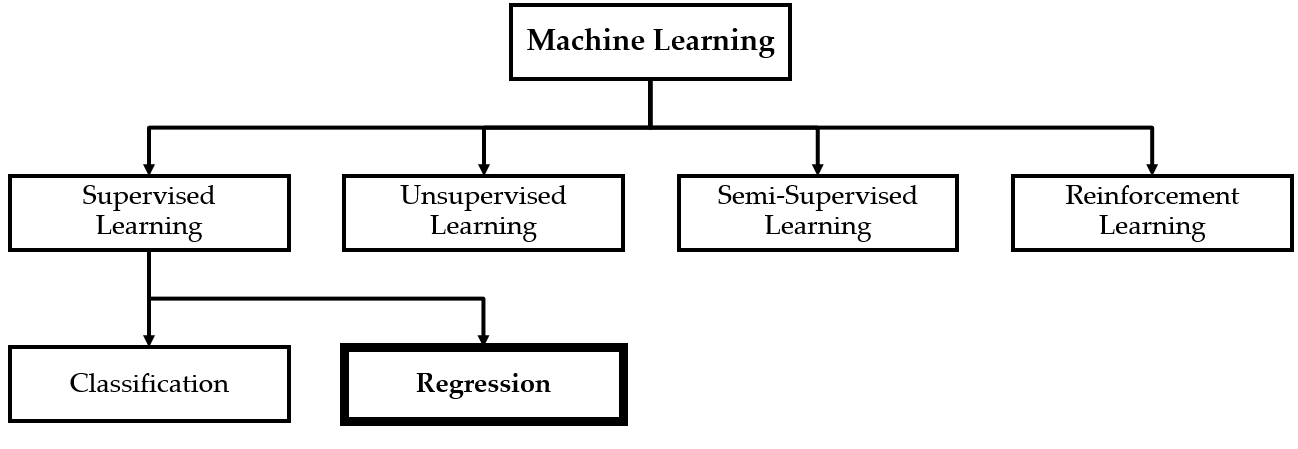

A supervised task in which the target/label is numeric type
- Numerical comparisons like < or > are meaningful
- Statistics like mean, variance, standard deviation, etc. make are meaningful

The models must learrn a mapping from the input features to the numerical target

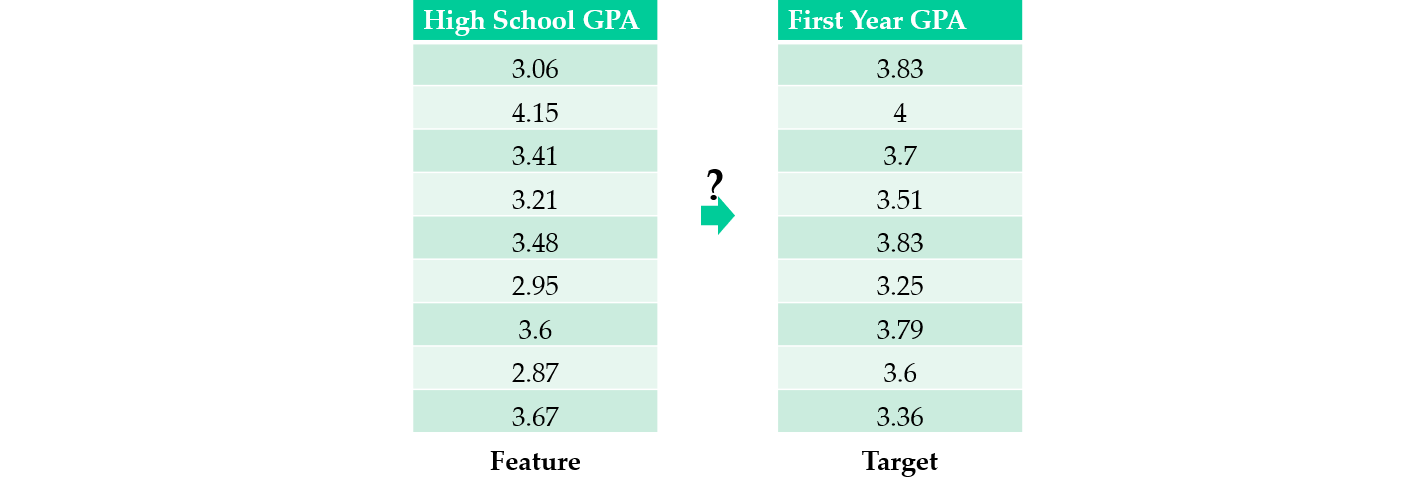

<h3> Loading the data </h3>

The task in this dataset is to predict first year GPA of college students based on

1. HSGPA: High school GPA on a 0.0 to 4.0 scale
2. SATV: Verbal/critical reading SAT score
3. SATM: Math SAT score
4. HU: Number of credit hours earned in humanities courses in high school
5. SS: Number of credit hours earned in social science courses in high school
6. CollegeBound: 1=attended a high school where >=50% students intended to go on to college, 0=otherwise

In [1]:
import pandas as pd
import numpy as np

In [2]:
fyGPA = pd.read_csv('firstyearGPA.csv')
fyGPA.head()

,GPA,HSGPA,SATV,SATM,HU,SS,CollegeBound
0,3.06,3.83,680,770,3.0,9.0,1
1,4.15,4.00,740,720,9.0,3.0,1
2,3.41,3.70,640,570,16.0,13.0,1
3,3.21,3.51,740,700,22.0,0.0,1
4,3.48,3.83,610,610,30.5,1.5,1


First, let's look into the simplest case of having one featurer and one target. I will pick HSGPA.

In [14]:
x = fyGPA['HSGPA']
y = fyGPA['GPA']

Histograms of high school GPA and first year GPA. Nothing seem odd here.

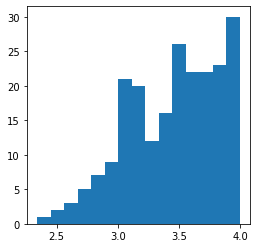

In [27]:
plt.figure(figsize=(4,4))
plt.hist(x, bins=15)
plt.show()

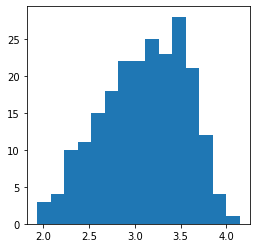

In [28]:
plt.figure(figsize=(4,4))
plt.hist(y, bins=15)
plt.show()

To visualize the correlation (relationship) between a single numerical feature and a single numerical target, we can use a <b>scatter plot</b>

In [15]:
import matplotlib.pyplot as plt

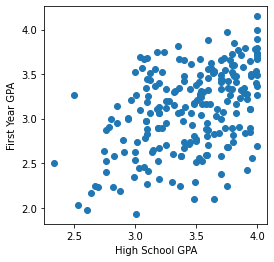

In [16]:
plt.figure(figsize=(4,4))
plt.scatter(x,y)
plt.xlabel('High School GPA')
plt.ylabel('First Year GPA')
plt.show()

A scatter plot has two axes
- The vertical axis usually represents the range of the target
- The horizontal axis usually represents the range of the feature
- Each point in the plot represents one data instance. The coordinations of the point are its true values of target and feature

We can usually add a fitted line to further investigate the pattern

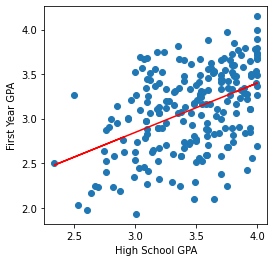

In [17]:
plt.figure(figsize=(4,4))
a, b = np.polyfit(x, y, 1)
plt.scatter(x,y)
plt.plot(x, a*x+b, color='red')
plt.xlabel('High School GPA')
plt.ylabel('First Year GPA')
plt.show()

The pattern of the points in the scatter plot illustrates how strongly/weakly the feature and target correlate to each other
- A very defined pattern with a clear trend indicate strong correlation - we can get more accurate models if the correlations between features and target are strong
    - If the pattern seems like a straight line, the correlation is linear
    - If the pattern follows a curve, the correlation is non-linear
- A less defined pattern (the points spread more vertically) means weaker correlations - we will get less accurate models
- If the points spread all over the plot without any patterns, there are no correlations - models' performances will be very poor

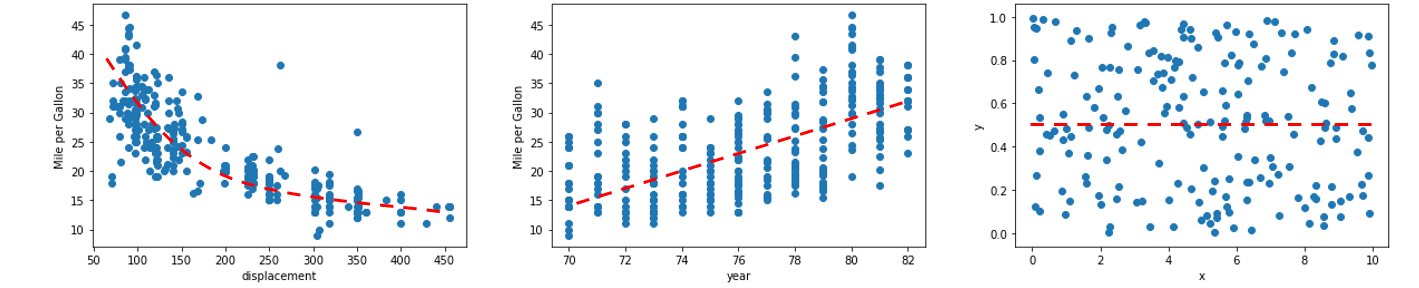

Note that the number 1 in polyfit(x,y,1) means to fit a polynomial of degree 1 between x and y. In other words, a straight line y = ax + b will be fitted. We can investigate the values of a and b

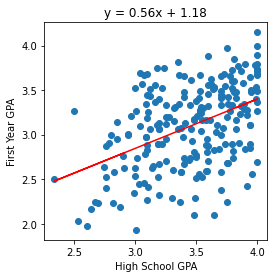

In [30]:
plt.figure(figsize=(4,4))
a, b = np.polyfit(x, y, 1)
plt.scatter(x,y)
plt.plot(x, a*x+b, color='red')
plt.xlabel('High School GPA')
plt.ylabel('First Year GPA')
plt.title('y = {a:.2f}x + {b:.2f}'.format(a=a,b=b))
plt.show()

This means, the estimation is FYGPA = 0.56HSGPA + 1.18

Furthermore, the drawed line is actually the prediction values for each students. We can see that the error is quite high in this case.

We can change the degree to higher if the patterns are curvy

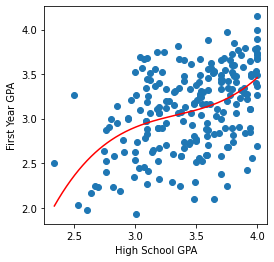

In [18]:
plt.figure(figsize=(4,4))
a, b, c, d = np.polyfit(x, y, 3)
plt.scatter(x,y)
xc = np.linspace(x.min(), x.max(),200)
yc = a*xc**3+b*xc**2+c*xc+d
plt.plot(xc, yc, 'red')
plt.xlabel('High School GPA')
plt.ylabel('First Year GPA')
plt.show()

<h3>Regression Modeling</h3>

Before talking about evaluation measurements for regression, let's return to the case with the complete dataset. As usual, we perform train/test split first. We can use random split

In [32]:
from sklearn.model_selection import train_test_split

X = fyGPA.drop('GPA', axis=1)
y = fyGPA['GPA']

trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.25)

trainX.shape, testX.shape, trainY.shape, testY.shape

((164, 6), (55, 6), (164,), (55,))

We can look at the descriptive statistics of the columns

In [5]:
trainX.describe()

,HSGPA,SATV,SATM,HU,SS,CollegeBound
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,3.477561,602.378049,632.378049,12.766463,7.466463,0.920732
std,0.359603,87.647249,78.121054,7.438395,5.060411,0.270984
min,2.610000,260.000000,430.000000,0.000000,0.000000,0.000000
25%,3.197500,560.000000,580.000000,7.000000,3.000000,1.000000
50%,3.530000,610.000000,640.000000,12.000000,6.500000,1.000000
75%,3.782500,662.500000,690.000000,17.000000,11.000000,1.000000
max,4.000000,740.000000,800.000000,40.000000,21.000000,1.000000


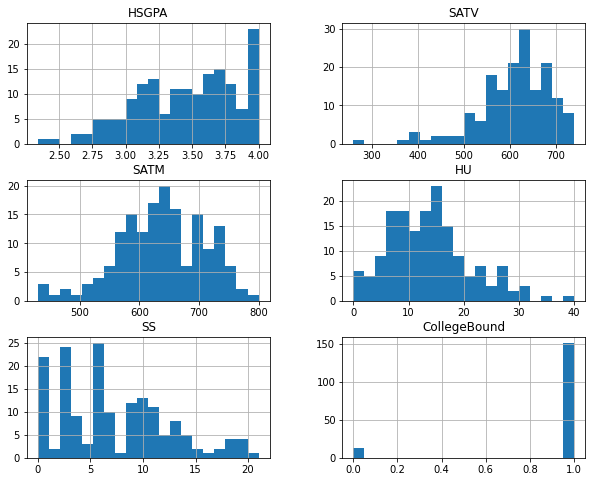

In [34]:
from matplotlib import pyplot as plt

trainX.hist(bins=20, figsize=(10,8))
plt.show()

In [35]:
trainY.describe()

count    164.000000
mean       3.100305
std        0.452663
min        1.930000
25%        2.767500
50%        3.135000
75%        3.440000
max        4.000000
Name: GPA, dtype: float64

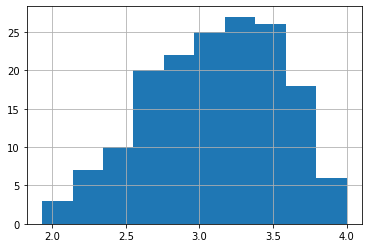

In [36]:
trainY.hist()
plt.show()

There are no missing data or class data, so we can just standardize everything in a single numeric pipeline. Let's also look at the scatter plots

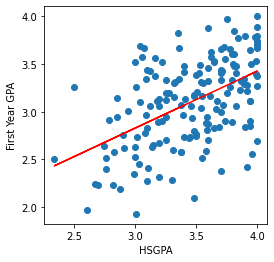

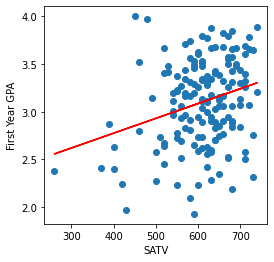

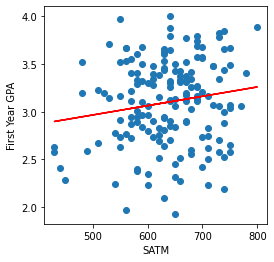

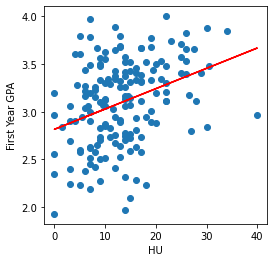

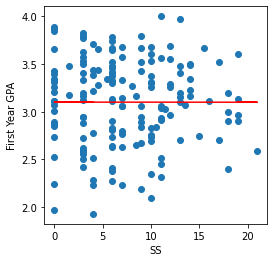

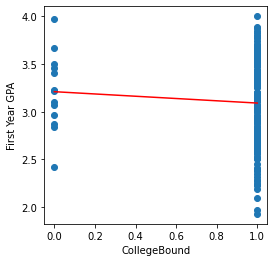

In [44]:
for col in trainX.columns:
    plt.figure(figsize=(4,4))
    a, b = np.polyfit(trainX[col], trainY, 1)
    plt.scatter(trainX[col], trainY)
    plt.plot(trainX[col], a*trainX[col]+b, color='red')
    plt.xlabel(col)
    plt.ylabel('First Year GPA')
    plt.show()
    plt.show()

Finally, the pipeline to standardize the data

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ('standardize', StandardScaler())
])

trainX_prc = num_pipeline.fit_transform(trainX)

<h3>Modeling</h3>

Now let's use sklearn linear regression model

In [38]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()

linear_reg.fit(trainX_prc,trainY)

LinearRegression()

The most common evaluation measurement for regression problem is Mean Squared Error - MSE. As each data point has a true value for the target, and a predicted value made by a model, MSE is the average squared differences among all true/predicted value pairs

$MSE = \dfrac{(true - predicted)^2}{n}$

In [40]:
from sklearn.metrics import mean_squared_error

#get the prediction
trainY_pred = linear_reg.predict(trainX_prc)

#get the MSE
mse_lr = mean_squared_error(trainY, trainY_pred)
print(mse_lr)

0.13039993825582455


A very similar metric is Root Mean Squared Error - RMSE which is the square root of the MSE

In [33]:
np.sqrt(mse_lr)

0.3814826647933664

RMSE is intepreted as the average errors between the predicted values and the true values, in this case, the predicted first year GPA and the true first year GPA of the students.

Is this a good model? Recall, the range of GPA is from 0 - 4 (or in this data, 2.0 - 4.15), so is an average error of 0.381 good enough?

Measurements like MSE and RMSE are dependent on the target range, and could be hard to interprete sometimes. We can use a different measurement that is the R-Squared

In [41]:
from sklearn.metrics import r2_score

r2_lr = r2_score(trainY, trainY_pred)
print(r2_lr)

0.3596991663107111


R2 score is always less than 1, and it is interpreted as the percentage of variation in the data that our model can explain. In cases with very bad-fit models, R2 can get to negative values.

In this case, this linear regression model can explain about 36% variation in the data, so it is not that good even in the training set.

<h4>Cross-Validation Measurements</h4>

We've been fitting and testing the linear regression model on the same training data. A better way is to use cross_val_score() as in classification

In [45]:
from sklearn.model_selection import cross_val_score

mse_lr_cv = - cross_val_score(linear_reg, trainX_prc, trainY, cv=5, scoring='neg_mean_squared_error')
r2_lr_cv = cross_val_score(linear_reg, trainX_prc, trainY, cv=5, scoring='r2')

print('MSE: ', mse_lr_cv.mean())
print('R2: ', r2_lr_cv.mean())

MSE:  0.14478037538041383
R2:  0.2762670867354141


so, this linear regression model is a bit worse when applying on new data.

Let's try a random forest. Note that in this case we need to use RandomForestRegressor instead of RandomForestClassifier as in classification tasks.

In [46]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()

mse_rf_cv = - cross_val_score(rf_reg, trainX_prc, trainY, cv=5, scoring='neg_mean_squared_error')
r2_rf_cv = cross_val_score(rf_reg, trainX_prc, trainY, cv=5, scoring='r2')

print('MSE: ', mse_rf_cv.mean())
print('R2: ', r2_rf_cv.mean())

MSE:  0.1662283198560606
R2:  0.16104469545253164


And it is worse than the simple linear regression, possibly due to the small size of this dataset (164 instances in training)

Unlike classification with many measurements to evaluate your models, in regression, most of the times we just use MSE/RMSE and R2. To obtain the predicted value, we can use cross_val_predict()

In [47]:
from sklearn.model_selection import cross_val_predict

trainY_pred_lrcv = cross_val_predict(linear_reg, trainX, trainY, cv=5)

If you want to see the true values and the predicted values

In [48]:
list(zip(trainY, trainY_pred_lrcv))

[(3.22, 3.1129398263709227),
 (3.89, 3.309756356954562),
 (3.46, 3.1419767560426908),
 (3.18, 3.2488462600906103),
 (2.63, 2.86704321764563),
 (3.71, 3.5191551155635405),
 (2.65, 2.87810101411071),
 (3.44, 2.7419309061039345),
 (3.16, 3.1971208491997203),
 (2.87, 2.9289065061372574),
 (2.77, 3.133534803467328),
 (3.82, 3.2025455644962553),
 (1.97, 2.501732058483385),
 (3.17, 3.098203677644317),
 (3.48, 3.208268041318376),
 (3.32, 3.2257918887502033),
 (2.69, 3.256117026019558),
 (2.53, 2.7547284542992423),
 (3.43, 2.7887623241274873),
 (3.26, 2.9084458123157457),
 (3.52, 3.1165411041808744),
 (3.0, 3.2943504139813164),
 (2.83, 3.1832570547401344),
 (3.57, 2.839693793608774),
 (3.13, 2.946408387506612),
 (3.06, 3.184059101911298),
 (3.68, 3.331846035466269),
 (2.38, 3.046453562468883),
 (2.4, 2.659253732410322),
 (2.9, 3.238227883142464),
 (3.11, 3.1953164901544593),
 (3.65, 3.3341365237336023),
 (3.66, 3.3880427494461114),
 (3.2, 3.1198059537229392),
 (3.67, 3.5070346369983603),
 (3.38

Finally, let's apply the model on the test data. The performance further reduced.

In [49]:
testX_prc = num_pipeline.transform(testX)

testY_pred = linear_reg.predict(testX_prc)

print('MSE:', mean_squared_error(testY, testY_pred))
print('R2:', r2_score(testY, testY_pred))

MSE: 0.19939238477960888
R2: 0.20664810315077775


<h3> More on Linear Regression Model </h3>

Linear regression is among the simplest models for regression tasks. For a given dataset that have features $x_1, x_2, ... x_k$ and target $y$, linear regression train a model in the form

$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_k x_k$

$\beta_0$ is call the intercept, and all other $\beta$ are called coefficients. 

You can see, this model estimates the target $y$ using a <b>linear</b> function of all inputs, hence the name linear regression

In sklearn, we can obtain the coefficients of a trained linear regression model with <b>coef_</b>. The coefficients are in the same order as the input features in the data (in this case, trainX)

In [50]:
linear_reg.coef_

array([0.1916979 , 0.0577449 , 0.01607888, 0.13823758, 0.05146667,
       0.00344707])

In [51]:
trainX.columns

Index(['HSGPA', 'SATV', 'SATM', 'HU', 'SS', 'CollegeBound'], dtype='object')

And the intercept

In [52]:
linear_reg.intercept_

3.1003048780487803

So, we can write the equation to predict a student's GPA as

$GPA = 3.100 + 0.1917\times HSGPA + 0.0577\times SATV + 0.0161\times SATM + 0.1382\times HU + 0.0515 \times SS + 0.0034 \times CollegeBound$

And we can use that equation to predict new students' first year GPA (or we can use the predict function of the model)

You can see, this linear regression model previously achieved an R2 of 0.2 - not particularly good for prediction. We can go back to the scatter plots to verify

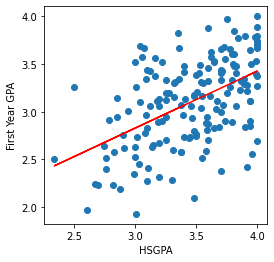

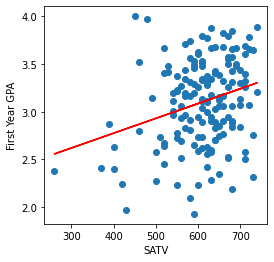

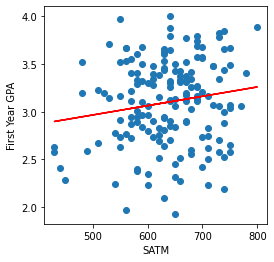

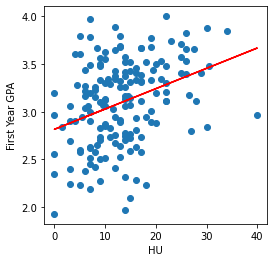

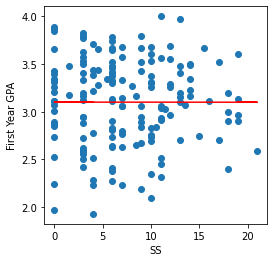

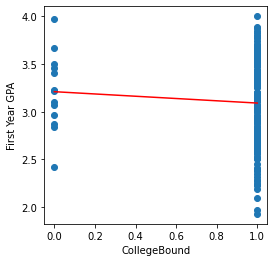

In [53]:
for col in trainX.columns:
    plt.figure(figsize=(4,4))
    a, b = np.polyfit(trainX[col], trainY, 1)
    plt.scatter(trainX[col], trainY)
    plt.plot(trainX[col], a*trainX[col]+b, color='red')
    plt.xlabel(col)
    plt.ylabel('First Year GPA')
    plt.show()
    plt.show()

As you can see, none of the features show any strong patterns with the target (first year GPA) - indicated by the spread-out and almost random patterns in all scatter plots. 

There is not much we can do in this kind of data which does not carry enough information to create a good model. 